## 6.4 Homework

### 6.4.1 Try to find a way to deal with the noisy data and give your reasoning.

### 6.4.2 Heat capacity of a solid
Debye's thory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one wa to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

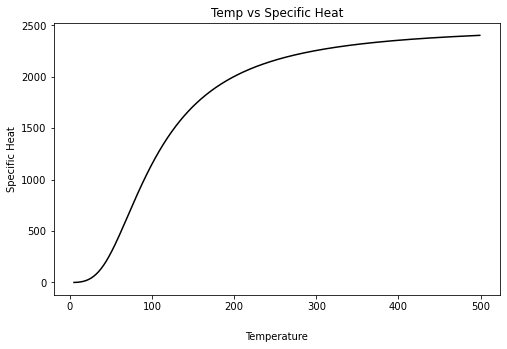

In [1]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
import scipy as sp

#defines our function
f = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2


#specific heat function
def specificHeat(V, p, kb, T, D):
    """
    function calculates the integral for
    the passed in T value
    
    this result is then multiplied by the 
    left hand side of the above formula
    and returned from the function
    
    """
    integral = integrate.quad(f, 0, D/T)
    return 9*V*p*kb *(T/D)**3 * integral[0]


#constants -> making sure everything is in 
#the correct units
V= 1000e-6
p= 6.0220e28
kb=1.38e-23
D= 428
T=5

#empty array to store specific heat values
Cv=[]

for i in range (5, 500):
    """
    loop to calculate the specific heat
    at different temperatures. Temperature
    range is from 5 to 500 K. 
    
    each iteration, our specific heat value is
    appended onto our specific heat array
    
    """
    Cv.append(specificHeat(V, p, kb,i, D ))


#outputting data
T= np.arange(5, 500, 1) 
plt.figure(figsize=(8,5))
plt.title("Temp vs Specific Heat")
plt.xlabel("Temperature", labelpad= 20)
plt.ylabel("Specific Heat")
plt.plot(T, Cv, color= 'black')